In [111]:
import pandas as pd
import math

In [125]:
# calculate seconds for sent
def get_processed_df(run_id: int, Mbps: int) -> pd.DataFrame:
    sent_df = pd.read_json(f'sent-data/{Mbps}M/{run_id}.json')
    received_df = pd.read_json(f'received-data/{Mbps}M/{run_id}.json')
    sent_df = pd.json_normalize(sent_df['sent_packet_list'])
    received_df = pd.json_normalize(received_df['received_packet_list'])
    sent_df['second'] = (sent_df['sent_time'] - sent_df['sent_time'].iloc[0]) / 1000
    sent_df['second'] = sent_df['second'].apply(lambda x: math.floor(x))
    sent_df['packet_id'] = sent_df['packet_id'].astype(int)
    received_df['packet_id'] = received_df['packet_id'].astype(int)
    sent_received = pd.merge(sent_df, received_df, how='left', left_on='packet_id', right_on='packet_id')
    return sent_received

In [126]:
def get_stats_values(df: pd.DataFrame) -> None:
    total_sent_packets = df.shape[0]
    total_received_packets = df[df['received_time'].notnull()].shape[0]
    print(f"Total sent packets: {total_sent_packets}")
    print(f"Total received packets: {total_received_packets}")
    print(f"Total lost packets: {total_sent_packets - total_received_packets}")
    print(f"Total lost packets percentage: {(total_sent_packets - total_received_packets) / total_sent_packets * 100}%")

In [127]:
df1 = get_processed_df(1, 10)
df1

,packet_id,sent_time,second,received_time
0,0,1669912392686,0,NaN
1,1,1669912392791,0,NaN
2,2,1669912392894,0,NaN
3,3,1669912392997,0,1.669912e+12
4,4,1669912393616,0,1.669912e+12
...,...,...,...,...
115,115,1669912425239,32,NaN
116,116,1669912425340,32,NaN
117,117,1669912425441,32,NaN
118,118,1669912425542,32,NaN


In [128]:
get_stats_values(df1)

Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%


In [130]:
second_received_packets_lists = []
for i in range(1, 6):
    df = get_processed_df(i, 10)
    print(f"Display stats for run {i}")
    get_stats_values(df)
    print("-------------------------")
    second_received_packets_list = []
    for second in range(df['second'].max() + 1):
        second_df = df[df['second'] == second]
        second_received_packets = second_df[second_df['received_time'].notnull()].shape[0]
        second_received_packets_list.append(second_received_packets)
    second_received_packets_lists.append(second_received_packets_list)
    

Display stats for run 1
Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
-------------------------
Display stats for run 2
Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
-------------------------
Display stats for run 3
Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
-------------------------
Display stats for run 4
Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
-------------------------
Display stats for run 5
Total sent packets: 120
Total received packets: 32
Total lost packets: 88
Total lost packets percentage: 73.33333333333333%
-------------------------


In [122]:
# second_received_packets_lists is a list of list, we want to calculate the max second count
max_second_count = 0
for second_received_packets_list in second_received_packets_lists:
    if len(second_received_packets_list) > max_second_count:
        max_second_count = len(second_received_packets_list)
        
print(f"Max second count: {max_second_count}")

Max second count: 36


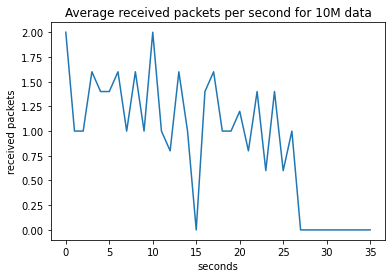

In [124]:
# second_received_packets_lists is a list of list, we want to calculate the max second count
max_second_count = 0
for second_received_packets_list in second_received_packets_lists:
    if len(second_received_packets_list) > max_second_count:
        max_second_count = len(second_received_packets_list)
        
print(f"Max second count: {max_second_count}")
# create a list of size max_second_count, and each element is average of the same second in every list
average_second_received_packets_list = []
for i in range(max_second_count):
    total_received_packets = 0
    for second_received_packets_list in second_received_packets_lists:
        if i < len(second_received_packets_list):
            total_received_packets += second_received_packets_list[i]
    average_second_received_packets_list.append(total_received_packets / len(second_received_packets_lists))

# plot the average line chart
plt.plot(average_second_received_packets_list)
plt.xlabel('seconds')
plt.ylabel('received packets')
plt.title('Average received packets per second for 10M data')
plt.show()

In [131]:
second_received_packets_lists = []
for i in range(1, 6):
    df = get_processed_df(i, 100)
    print(f"Display stats for run {i}")
    get_stats_values(df)
    print("-------------------------")
    second_received_packets_list = []
    for second in range(df['second'].max() + 1):
        second_df = df[df['second'] == second]
        second_received_packets = second_df[second_df['received_time'].notnull()].shape[0]
        second_received_packets_list.append(second_received_packets)
    second_received_packets_lists.append(second_received_packets_list)
    

Display stats for run 1
Total sent packets: 120
Total received packets: 88
Total lost packets: 32
Total lost packets percentage: 26.666666666666668%
-------------------------
Display stats for run 2
Total sent packets: 120
Total received packets: 99
Total lost packets: 21
Total lost packets percentage: 17.5%
-------------------------
Display stats for run 3
Total sent packets: 120
Total received packets: 93
Total lost packets: 27
Total lost packets percentage: 22.5%
-------------------------
Display stats for run 4
Total sent packets: 120
Total received packets: 94
Total lost packets: 26
Total lost packets percentage: 21.666666666666668%
-------------------------
Display stats for run 5
Total sent packets: 120
Total received packets: 90
Total lost packets: 30
Total lost packets percentage: 25.0%
-------------------------


Max second count: 27


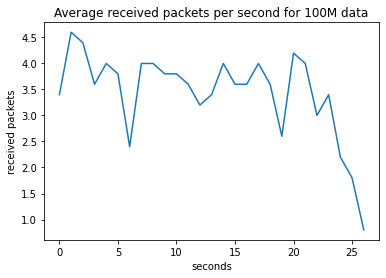

In [133]:
# second_received_packets_lists is a list of list, we want to calculate the max second count
max_second_count = 0
for second_received_packets_list in second_received_packets_lists:
    if len(second_received_packets_list) > max_second_count:
        max_second_count = len(second_received_packets_list)
        
print(f"Max second count: {max_second_count}")
# create a list of size max_second_count, and each element is average of the same second in every list
average_second_received_packets_list = []
for i in range(max_second_count):
    total_received_packets = 0
    for second_received_packets_list in second_received_packets_lists:
        if i < len(second_received_packets_list):
            total_received_packets += second_received_packets_list[i]
    average_second_received_packets_list.append(total_received_packets / len(second_received_packets_lists))

# plot the average line chart
plt.plot(average_second_received_packets_list)
plt.xlabel('seconds')
plt.ylabel('received packets')
plt.title('Average received packets per second for 100M data')
plt.show()